In [1]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib
import matplotlib.pyplot as plt

In [2]:
#Importing packages
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import preprocessing

In [3]:
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
os.chdir("C:/Users/A/Desktop/Bioactive/HSV-1")

In [5]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original_data.csv',index_col=0)

#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(5506, 3719)


,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
596.0,575.85,6.398333,89.9047,54.3018,103.2543,0.998941,0.603353,1.147270,0.052439,90.0,...,0.0,4.0,8.0,0.0,35.7,0.870732,9.900,0.241463,36.410500,9.464711
1318.0,286.71,11.468400,26.5637,18.6192,27.9438,1.062548,0.744768,1.117752,0.124183,25.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
1570.0,307.28,8.779429,36.6945,22.7556,39.4553,1.048414,0.650160,1.127294,0.108225,35.0,...,0.0,0.0,2.0,6.0,19.0,0.863636,6.625,0.301136,20.285139,6.320154
1821.0,282.29,8.302647,35.4617,21.1023,39.1162,1.042991,0.620656,1.150476,0.115789,34.0,...,0.0,0.0,0.0,10.0,17.0,0.850000,7.750,0.387500,19.586399,8.618182
2199.0,418.50,8.718750,48.6580,34.5683,53.0758,1.013708,0.720173,1.105746,0.075862,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000


In [6]:
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
X_NAomit_data

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
596.0,575.85,6.398333,89.9047,54.3018,103.2543,0.998941,0.603353,1.147270,0.052439,90.0,...,0.0,4.0,8.0,0.0,35.7,0.870732,9.900,0.241463,36.410500,9.464711
1318.0,286.71,11.468400,26.5637,18.6192,27.9438,1.062548,0.744768,1.117752,0.124183,25.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
1570.0,307.28,8.779429,36.6945,22.7556,39.4553,1.048414,0.650160,1.127294,0.108225,35.0,...,0.0,0.0,2.0,6.0,19.0,0.863636,6.625,0.301136,20.285139,6.320154
1821.0,282.29,8.302647,35.4617,21.1023,39.1162,1.042991,0.620656,1.150476,0.115789,34.0,...,0.0,0.0,0.0,10.0,17.0,0.850000,7.750,0.387500,19.586399,8.618182
2199.0,418.50,8.718750,48.6580,34.5683,53.0758,1.013708,0.720173,1.105746,0.075862,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135831485.0,413.49,8.614375,49.0871,33.0285,53.7835,1.022648,0.688094,1.120490,0.076355,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135900555.0,405.52,8.448333,48.4252,33.9150,53.7367,1.008858,0.706562,1.119515,0.078818,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135976680.0,244.31,7.185588,34.0507,22.4547,37.9498,1.001491,0.660432,1.116171,0.130719,34.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000


In [7]:
col_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)

In [8]:
X_NAomit_data

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
596.0,575.85,6.398333,89.9047,54.3018,103.2543,0.998941,0.603353,1.147270,0.052439,90.0,...,0.0,4.0,8.0,0.0,35.7,0.870732,9.900,0.241463,36.410500,9.464711
1318.0,286.71,11.468400,26.5637,18.6192,27.9438,1.062548,0.744768,1.117752,0.124183,25.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
1570.0,307.28,8.779429,36.6945,22.7556,39.4553,1.048414,0.650160,1.127294,0.108225,35.0,...,0.0,0.0,2.0,6.0,19.0,0.863636,6.625,0.301136,20.285139,6.320154
1821.0,282.29,8.302647,35.4617,21.1023,39.1162,1.042991,0.620656,1.150476,0.115789,34.0,...,0.0,0.0,0.0,10.0,17.0,0.850000,7.750,0.387500,19.586399,8.618182
2199.0,418.50,8.718750,48.6580,34.5683,53.0758,1.013708,0.720173,1.105746,0.075862,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135831485.0,413.49,8.614375,49.0871,33.0285,53.7835,1.022648,0.688094,1.120490,0.076355,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135900555.0,405.52,8.448333,48.4252,33.9150,53.7367,1.008858,0.706562,1.119515,0.078818,48.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135976680.0,244.31,7.185588,34.0507,22.4547,37.9498,1.001491,0.660432,1.116171,0.130719,34.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000


In [9]:
threshold = 0.99  # 如果列中 0 的比例超过 90%，则移除该列
non_zero_threshold = X_NAomit_data.shape[0] * (1 - threshold)
X_NAomit_data =X_NAomit_data.loc[:, (X_NAomit_data != 0).sum(axis=0) > non_zero_threshold]

In [10]:
X_NAomit_data 

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
596.0,575.85,6.398333,89.9047,54.3018,103.2543,0.998941,0.603353,1.147270,0.052439,90.0,...,15.80,4.0,8.0,0.0,35.7,0.870732,9.900,0.241463,36.410500,9.464711
1318.0,286.71,11.468400,26.5637,18.6192,27.9438,1.062548,0.744768,1.117752,0.124183,25.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
1570.0,307.28,8.779429,36.6945,22.7556,39.4553,1.048414,0.650160,1.127294,0.108225,35.0,...,0.00,0.0,2.0,6.0,19.0,0.863636,6.625,0.301136,20.285139,6.320154
1821.0,282.29,8.302647,35.4617,21.1023,39.1162,1.042991,0.620656,1.150476,0.115789,34.0,...,1.75,0.0,0.0,10.0,17.0,0.850000,7.750,0.387500,19.586399,8.618182
2199.0,418.50,8.718750,48.6580,34.5683,53.0758,1.013708,0.720173,1.105746,0.075862,48.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135831485.0,413.49,8.614375,49.0871,33.0285,53.7835,1.022648,0.688094,1.120490,0.076355,48.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135900555.0,405.52,8.448333,48.4252,33.9150,53.7367,1.008858,0.706562,1.119515,0.078818,48.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135976680.0,244.31,7.185588,34.0507,22.4547,37.9498,1.001491,0.660432,1.116171,0.130719,34.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000


In [11]:
X=np.array(X_NAomit_data)
X

array([[5.75850000e+02, 6.39833333e+00, 8.99047000e+01, ...,
        2.41463415e-01, 3.64104998e+01, 9.46471121e+00],
       [2.86710000e+02, 1.14684000e+01, 2.65637000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.07280000e+02, 8.77942857e+00, 3.66945000e+01, ...,
        3.01136364e-01, 2.02851394e+01, 6.32015396e+00],
       ...,
       [2.44310000e+02, 7.18558824e+00, 3.40507000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.17500000e+02, 9.70930233e+00, 4.43963000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.98440000e+02, 7.65230769e+00, 3.86761000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [12]:
X_NAomit_data 

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
596.0,575.85,6.398333,89.9047,54.3018,103.2543,0.998941,0.603353,1.147270,0.052439,90.0,...,15.80,4.0,8.0,0.0,35.7,0.870732,9.900,0.241463,36.410500,9.464711
1318.0,286.71,11.468400,26.5637,18.6192,27.9438,1.062548,0.744768,1.117752,0.124183,25.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
1570.0,307.28,8.779429,36.6945,22.7556,39.4553,1.048414,0.650160,1.127294,0.108225,35.0,...,0.00,0.0,2.0,6.0,19.0,0.863636,6.625,0.301136,20.285139,6.320154
1821.0,282.29,8.302647,35.4617,21.1023,39.1162,1.042991,0.620656,1.150476,0.115789,34.0,...,1.75,0.0,0.0,10.0,17.0,0.850000,7.750,0.387500,19.586399,8.618182
2199.0,418.50,8.718750,48.6580,34.5683,53.0758,1.013708,0.720173,1.105746,0.075862,48.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135831485.0,413.49,8.614375,49.0871,33.0285,53.7835,1.022648,0.688094,1.120490,0.076355,48.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135900555.0,405.52,8.448333,48.4252,33.9150,53.7367,1.008858,0.706562,1.119515,0.078818,48.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000
135976680.0,244.31,7.185588,34.0507,22.4547,37.9498,1.001491,0.660432,1.116171,0.130719,34.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000


In [13]:
Raw_data

,IsomericSMILES,Activity,Canonical_smiles
cid,,,
596.0,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,0,CC(C)CCCCCCCCCCCCC(=O)NCC(=O)NC1C(C)OC(Nc2ncnc...
1318.0,C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1,1,NC1=C(Cl)C(=O)c2ccc(S(N)(=O)=O)cc2C1=O
1570.0,C1=CC(=S)N(C=C1)O,1,O=C1NC2C(=CC(O)C(O)C2O)c2cc3c(c(O)c21)OCO3
1821.0,C1=C(C(=O)NC(=O)N1C2C(C(C(O2)CO)O)O)F,1,OCC1OC(n2ccc3c(NO)ncnc32)C(O)C1O
2199.0,CC(=O)OC1C(CNC1CC2=CC=C(C=C2)OC)O,1,Cc1ccc(S(=O)(=O)/N=C2\C=C(Nc3ccc(O)cc3)C(=O)c3...
...,...,...,...
135831485.0,CC(=O)C1=CC=C(C=C1)NC(=O)CSC2=NC3=C(C=NN3)C(=O)N2,0,COc1ccc(NC(=O)CSc2nc(O)cc(=O)n2-c2ccccc2OC)cc1
135900555.0,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,0,COc1ccc(NC(=O)CSc2ncnc3c2cnn3Cc2ccccc2)cc1
135976680.0,C1=CNC(=C1)/C=N/NC(=O)CSC2=C(C=CC(=C2)Cl)Cl,0,CC1(C)CC(=O)C=C(c2ccc3c(c2)OCO3)C1


In [14]:
y=Raw_data['Activity']

In [15]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# 1. LASSO

In [16]:
model = make_pipeline(StandardScaler(), LassoCV(cv=Cv_model)).fit(X, y)

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13513581028144017, tolerance: 0.09708798819255256
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16641975154573174, tolerance: 0.09708798819255256
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1937054899880195, tolerance: 0.09708798819255256
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model

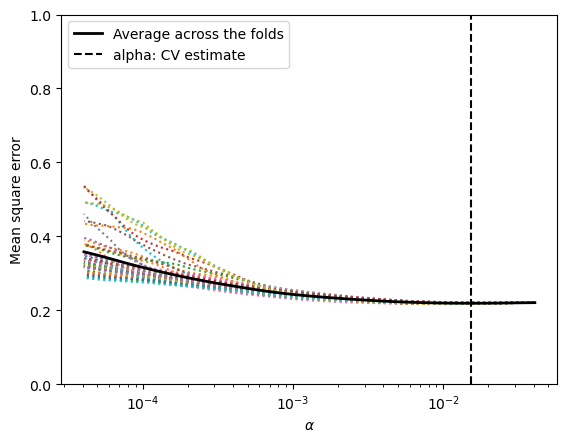

In [17]:
ymin, ymax =0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()


In [18]:
lasso.alpha_

0.01535152707471842

In [19]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [20]:
lsvc =  Lasso(alpha=lasso.alpha_).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.865e+02, tolerance: 1.214e-01
  model = cd_fast.enet_coordinate_descent(


(5506, 96)

In [21]:
lasso_coef=pd.DataFrame(lsvc.coef_)
lasso_coef.index=X_NAomit_data.columns
lasso_coef.columns=["coef"]
lasso_coef


,coef
MW,0.000064
AMW,0.000000
Se,-0.000000
Sp,0.000000
Si,-0.000000
...,...
s34_relSize,0.000000
s34_phSize,-0.000000
s34_phRelSize,0.000000
chiralMoment,-0.000000


In [22]:
lasso_coef_last=lasso_coef[(lasso_coef["coef"]>0)|(lasso_coef["coef"]<0)]
lasso_coef_last.to_csv("./Supplementary Data S6.csv",sep=',')
lasso_coef_last.head()

,coef
MW,0.000064
D/Dtr05,0.000244
D/Dtr06,0.000004
D/Dtr07,0.000045
D/Dtr08,-0.000302


In [23]:
Lasso_data=X_NAomit_data[X_NAomit_data.columns[model.get_support()]]
Lasso_data

,MW,D/Dtr05,D/Dtr07,D/Dtr08,D/Dtr09,D/Dtr11,D/Dtr12,ECC,MDDD,UNIP,...,T(O..S),T(O..Cl),T(S..S),T(S..F),T(S..Cl),T(F..Cl),F06[C-O],F10[C-O],Vx,s34_size
cid,,,,,,,,,,,,,,,,,,,,,
596.0,575.85,120.338190,0.0,0.0,224.172659,0.0,0.0,870.0,79.541939,296.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,764.617940,35.7
1318.0,286.71,0.000000,0.0,0.0,0.000000,0.0,0.0,114.0,10.123457,44.0,...,11.0,23.0,0.0,0.0,7.0,0.0,4.0,0.0,292.807309,0.0
1570.0,307.28,32.742306,0.0,0.0,52.793654,0.0,0.0,156.0,12.818182,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,322.674419,19.0
1821.0,282.29,84.731227,0.0,0.0,71.612032,0.0,0.0,154.0,12.800000,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,307.873754,17.0
2199.0,418.50,0.000000,0.0,0.0,0.000000,0.0,0.0,337.0,27.973333,112.0,...,16.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,497.807309,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135831485.0,413.49,0.000000,0.0,0.0,0.000000,0.0,0.0,346.0,27.512485,117.0,...,24.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,486.245847,0.0
135900555.0,405.52,65.685720,0.0,0.0,124.924533,0.0,0.0,396.0,33.479191,132.0,...,11.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,488.372093,0.0
135976680.0,244.31,37.444123,0.0,0.0,63.742172,0.0,0.0,119.0,9.876543,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,308.538206,0.0


In [24]:
Lasso_data.to_csv('./Lasso_data.csv',encoding='utf-8')

In [25]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Lasso_data)
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

joblib.dump(Transformer, './Lasso_Scaler_transformer.pkl')

X_scaled_data

,MW,D/Dtr05,D/Dtr07,D/Dtr08,D/Dtr09,D/Dtr11,D/Dtr12,ECC,MDDD,UNIP,...,T(O..S),T(O..Cl),T(S..S),T(S..F),T(S..Cl),T(F..Cl),F06[C-O],F10[C-O],Vx,s34_size
cid,,,,,,,,,,,,,,,,,,,,,
596.0,0.455341,0.269087,0.0,0.0,0.255238,0.0,0.0,0.478137,0.488784,0.468354,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.125000,0.107692,0.481851,0.483942
1318.0,0.161902,0.000000,0.0,0.0,0.000000,0.0,0.0,0.048836,0.051206,0.069620,...,0.061453,0.088462,0.000000,0.0,0.109375,0.0,0.055556,0.000000,0.124868,0.000000
1570.0,0.182778,0.073215,0.0,0.0,0.060110,0.0,0.0,0.072686,0.068192,0.093354,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.208333,0.000000,0.147466,0.257560
1821.0,0.157416,0.189466,0.0,0.0,0.081536,0.0,0.0,0.071550,0.068078,0.085443,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.097222,0.000000,0.136268,0.230448
2199.0,0.295651,0.000000,0.0,0.0,0.000000,0.0,0.0,0.175468,0.163722,0.177215,...,0.089385,0.000000,0.000000,0.0,0.000000,0.0,0.152778,0.076923,0.279976,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135831485.0,0.290567,0.000000,0.0,0.0,0.000000,0.0,0.0,0.180579,0.160817,0.185127,...,0.134078,0.000000,0.000000,0.0,0.000000,0.0,0.180556,0.092308,0.271228,0.000000
135900555.0,0.282478,0.146879,0.0,0.0,0.142237,0.0,0.0,0.208972,0.198428,0.208861,...,0.061453,0.000000,0.000000,0.0,0.000000,0.0,0.069444,0.046154,0.272837,0.000000
135976680.0,0.118871,0.083728,0.0,0.0,0.072576,0.0,0.0,0.051675,0.049650,0.074367,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.083333,0.000000,0.136770,0.000000


In [26]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [27]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [28]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Activity'].values

## 1.1 DT

In [29]:
clf=DecisionTreeClassifier(random_state=0)

In [30]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.561824,0.002010
Accuracy_train,0.997771,0.000054
F1 Score,0.342696,0.003258
Precision,0.337480,0.002981
Recall,0.348310,0.003755
Roc_auc,0.507372,0.002285


In [31]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=12, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 09:15:25,860] A new study created in memory with name: no-name-123a8505-cbc8-45f1-9330-2ae4d14325a8
[I 2024-11-14 09:15:28,935] Trial 0 finished with value: 0.6703964552930762 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6703964552930762.
[I 2024-11-14 09:15:29,182] Trial 1 finished with value: 0.6695788352776144 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6703964552930762.
[I 2024-11-14 09:15:29,431] Trial 2 finished with value: 0.6690706188566408 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 0 with value: 0.6703964552930762.
[I 2024-11-14 09:15:29,678] Trial 3 finished with value: 0.6696515789144004 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 0 with value: 0.6703964552930762.
[I 2024-11-14 09:15:29,976] Trial 4 finished with value: 0.66916095085972 

In [32]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 3, 'max_features': 19, 'min_samples_split': 13}


In [33]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.671395,0.000598
Accuracy_train,0.679363,0.000222
F1 Score,0.053825,0.003192
Precision,0.518709,0.019108
Recall,0.028779,0.001825
Roc_auc,0.506893,0.001401


In [34]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./DT_model_lasso_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.561824  0.002010  0.671395  0.000598
Accuracy_train  0.997771  0.000054  0.679363  0.000222
F1 Score        0.342696  0.003258  0.053825  0.003192
Precision       0.337480  0.002981  0.518709  0.019108
Recall          0.348310  0.003755  0.028779  0.001825
Roc_auc         0.507372  0.002285  0.506893  0.001401

## 1.2 LR

In [35]:
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

In [36]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.674156,0.000529
Accuracy_train,0.677833,0.000165
F1 Score,0.057480,0.001867
Precision,0.576918,0.016077
Recall,0.030325,0.001014
Roc_auc,0.542017,0.002144


In [37]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 09:15:59,590] A new study created in memory with name: no-name-e7040975-4011-432d-8c6b-812f7a189d76
[I 2024-11-14 09:16:02,564] Trial 0 finished with value: 0.6746096520074968 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6746096520074968.
[I 2024-11-14 09:16:03,090] Trial 1 finished with value: 0.6723937651137146 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.6746096520074968.
[I 2024-11-14 09:16:03,511] Trial 2 finished with value: 0.6718126237325909 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.6746096520074968.
[I 2024-11-14 09:16:04,613] Trial 3 finished with value: 0.6736288739324587 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 0 with value: 0.674609652

In [38]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 0.33067967343321536, 'l1_ratio': 0.15625011559578697, 'max_iter': 571}


In [39]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.674664,0.000441
Accuracy_train,0.676816,0.000118
F1 Score,0.043715,0.001559
Precision,0.634184,0.020502
Recall,0.022689,0.000828
Roc_auc,0.539800,0.002153


In [40]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./LR_model_lasso_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.674156  0.000529  0.674664  0.000441
Accuracy_train  0.677833  0.000165  0.676816  0.000118
F1 Score        0.057480  0.001867  0.043715  0.001559
Precision       0.576918  0.016077  0.634184  0.020502
Recall          0.030325  0.001014  0.022689  0.000828
Roc_auc         0.542017  0.002144  0.539800  0.002153

## 1.3 RF

In [41]:
clf=RandomForestClassifier(random_state=0)

In [42]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.656248,0.001077
Accuracy_train,0.997771,0.000054
F1 Score,0.156445,0.002816
Precision,0.402912,0.006301
Recall,0.097287,0.001925
Roc_auc,0.525142,0.002364


In [43]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-11-14 09:20:34,862] A new study created in memory with name: no-name-2e03eafe-db74-4721-bcf5-4ec67f45f110
[I 2024-11-14 09:20:42,961] Trial 0 finished with value: 0.6718126237325909 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.6718126237325909.
[I 2024-11-14 09:20:49,071] Trial 1 finished with value: 0.6718126237325909 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.6718126237325909.
[I 2024-11-14 09:21:03,158] Trial 2 finished with value: 0.6718126237325909 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.6718126237325909.
[I 2024-11-14 09:21:10,145] Trial 3 finished with value: 0.6718126237325909 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [44]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}


In [45]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetri

,Mean,Se
Accuracy_test,0.671813,0.000054
Accuracy_train,0.671813,0.000014
F1 Score,0.000000,0.000000
Precision,0.000000,0.000000
Recall,0.000000,0.000000
Roc_auc,0.500000,0.000000


In [46]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./RF_model_lasso_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.656248  0.001077  0.671813  0.000054
Accuracy_train  0.997771  0.000054  0.671813  0.000014
F1 Score        0.156445  0.002816  0.000000  0.000000
Precision       0.402912  0.006301  0.000000  0.000000
Recall          0.097287  0.001925  0.000000  0.000000
Roc_auc         0.525142  0.002364  0.500000  0.000000

## 1.4 XGBoost

In [47]:
clf=xgb.XGBClassifier(random_state=0)

In [48]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.624410,0.001587
Accuracy_train,0.996327,0.000108
F1 Score,0.245907,0.003748
Precision,0.360353,0.004633
Recall,0.186940,0.003237
Roc_auc,0.517394,0.002496


In [49]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 09:34:41,481] A new study created in memory with name: no-name-4e5cc26f-e0ac-46b1-8c5e-7f0cb36f6acd
C:\Users\A\AppData\Local\Temp\ipykernel_83288\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_83288\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [50]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 1.1247126473616482, 'alpha': 0.01541636844184897, 'colsample_bytree': 0.6000000000000001, 'subsample': 0.8, 'learning_rate': 0.0001, 'n_estimators': 831}


In [51]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.673556,0.000568
Accuracy_train,0.693866,0.000453
F1 Score,0.052178,0.002115
Precision,0.563572,0.017971
Recall,0.027447,0.001141
Roc_auc,0.525806,0.002559


In [52]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./XGB_model_lasso_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.624410  0.001587  0.673556  0.000568
Accuracy_train  0.996327  0.000108  0.693866  0.000453
F1 Score        0.245907  0.003748  0.052178  0.002115
Precision       0.360353  0.004633  0.563572  0.017971
Recall          0.186940  0.003237  0.027447  0.001141
Roc_auc         0.517394  0.002496  0.525806  0.002559

# 2. MLREM

In [90]:
col_data= pd.read_csv("./Results/MLREM_col.csv",header=0,index_col=0)

In [91]:
MRLEM_data=X_NAomit_data[col_data.index]
MRLEM_data

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,66.871159,348.869542,135.0,383.0,2886.0,5576.0,10547.0,5729.0,4739.692713,...,90.763661,139.049917,75.680233,63.202194,1.899093,36.892542,0.0,139.54,160.947217,291.295681
Ma_2019_U,244.23,0.000000,340.039426,118.0,295.0,2084.0,4432.0,8734.0,2194.0,3416.557603,...,139.839496,139.049917,0.000000,48.373245,46.279992,36.205320,0.0,124.78,146.060780,262.840532
Ma_2019_C,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Ma_2019_G,283.28,71.547747,387.546658,144.0,446.0,3270.0,6542.0,12768.0,6578.0,5547.544286,...,117.471961,139.049917,32.387883,80.922082,45.054770,36.939118,0.0,159.51,178.957968,301.046512
Ma_2019_dA,251.28,63.146800,315.599992,128.0,336.0,2584.0,4822.0,8812.0,5068.0,4099.715332,...,52.221046,96.366574,75.680233,63.202194,1.899093,36.335611,0.0,119.31,118.263874,281.544850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Tang_2019_DideoxyC,211.25,0.000000,253.494297,103.0,213.0,1585.0,2963.0,5062.0,1633.0,2398.199373,...,59.519699,53.683231,0.000000,67.057867,3.124314,34.619300,0.0,90.37,75.580531,250.166113
Peters_2014_3,268.26,66.871159,369.000658,135.0,383.0,2886.0,5763.0,11275.0,5729.0,4739.692713,...,100.945467,139.049917,32.387883,87.641582,27.044020,36.892542,0.0,133.49,146.060780,284.468439


In [92]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(MRLEM_data)
X_scaled_data=Transformer.transform(MRLEM_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=MRLEM_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/MRLEM_data_X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/MRLEM_data_Scaler_transformer.pkl')

X_scaled_data.head()

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.181294,0.193207,0.036281,0.026667,0.030815,0.037803,0.044265,0.024087,0.024617,...,0.176802,0.999046,0.285905,0.104723,0.015761,0.446054,0.0,0.472652,0.769847,0.069993
Ma_2019_U,0.075722,0.000000,0.175319,0.017007,0.012863,0.011819,0.021252,0.029633,0.003299,0.010706,...,0.401921,0.999046,0.000000,0.031193,0.384100,0.311208,0.0,0.330770,0.665700,0.021569
Ma_2019_C,0.073472,0.000000,0.134701,0.017007,0.012863,0.011819,0.018475,0.023484,0.003299,0.010706,...,0.389042,0.999046,0.000000,0.123842,0.025930,0.311208,0.0,0.388926,0.769847,0.033187
Ma_2019_G,0.165381,0.193972,0.271557,0.046485,0.036549,0.039910,0.051778,0.062188,0.029080,0.033111,...,0.299317,0.999046,0.122355,0.192589,0.373931,0.455193,0.0,0.664616,0.895853,0.086587
Ma_2019_dA,0.091909,0.171197,0.125811,0.028345,0.019294,0.023662,0.026894,0.030263,0.020200,0.017889,...,0.000000,0.666030,0.285905,0.104723,0.015761,0.336774,0.0,0.278189,0.471230,0.053399


In [93]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc'])
    return Model

In [94]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [95]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

## 2.1 DT

In [139]:
clf=DecisionTreeClassifier(random_state=0)

In [96]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.629333,0.015032
Accuracy_train,0.729981,0.004700
F1 Score,0.697627,0.013235
Precision,0.620752,0.011961
Recall,0.811071,0.020893
Roc_auc,0.664796,0.020543


In [97]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:29:56,212] A new study created in memory with name: no-name-6a0b1671-0ec2-4905-98f9-69d2f7e33654
[I 2024-01-12 01:29:57,476] Trial 0 finished with value: 0.6312380952380953 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,505] Trial 1 finished with value: 0.5926666666666667 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,530] Trial 2 finished with value: 0.6375238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,554] Trial 3 finished with value: 0.6208571428571428 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,579] Trial 4 finished with value: 0.629619047619047

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 13, 'min_samples_split': 3}


In [102]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [103]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_mlrem_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.629333  0.015032  0.680000  0.012329
Accuracy_train  0.729981  0.004700  0.925345  0.005584
F1 Score        0.697627  0.013235  0.706865  0.012092
Precision       0.620752  0.011961  0.698240  0.013460
Recall          0.811071  0.020893  0.735714  0.020076
Roc_auc         0.664796  0.020543  0.690561  0.015281

## 2.2 LR

In [104]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:33:46,194] A new study created in memory with name: no-name-e4ba7b5b-b8fd-4929-82c3-50137ca4832b
[I 2024-01-12 01:33:46,218] Trial 0 finished with value: 0.6096190476190476 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6096190476190476.
[I 2024-01-12 01:33:46,239] Trial 1 finished with value: 0.6195238095238095 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,262] Trial 2 finished with value: 0.570095238095238 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,284] Trial 3 finished with value: 0.6294285714285714 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6294285714

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 1.5684558195868687, 'l1_ratio': 0.51063148634346, 'max_iter': 1863}


In [108]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.632190,0.014648
Accuracy_train,0.735909,0.004541
F1 Score,0.694496,0.013341
Precision,0.627650,0.012121
Recall,0.794643,0.021058
Roc_auc,0.673325,0.020325


In [109]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_mlrem_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.680000  0.012329  0.632190  0.014648
Accuracy_train  0.925345  0.005584  0.735909  0.004541
F1 Score        0.706865  0.012092  0.694496  0.013341
Precision       0.698240  0.013460  0.627650  0.012121
Recall          0.735714  0.020076  0.794643  0.021058
Roc_auc         0.690561  0.015281  0.673325  0.020325

## 2.3 RF

In [110]:
clf=RandomForestClassifier(random_state=0)

In [111]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676381,0.014691
Accuracy_train,0.978164,0.001539
F1 Score,0.711877,0.013423
Precision,0.688878,0.014746
Recall,0.757857,0.020561
Roc_auc,0.756424,0.017012


In [112]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:35:16,075] A new study created in memory with name: no-name-0e368382-34a5-42fd-91ba-b1b1a0a8e3bf
[I 2024-01-12 01:35:19,314] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:21,908] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:27,120] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:30,335] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [113]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 879, 'max_depth': 9, 'max_features': 28, 'min_impurity_decrease': 0.008123194334826785}


In [115]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670571,0.013460
Accuracy_train,0.974643,0.001874
F1 Score,0.703054,0.013994
Precision,0.681364,0.014131
Recall,0.749643,0.022551
Roc_auc,0.752985,0.015938


In [116]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_mlrem_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676381  0.014691  0.670571  0.013460
Accuracy_train  0.978164  0.001539  0.974643  0.001874
F1 Score        0.711877  0.013423  0.703054  0.013994
Precision       0.688878  0.014746  0.681364  0.014131
Recall          0.757857  0.020561  0.749643  0.022551
Roc_auc         0.756424  0.017012  0.752985  0.015938

## 2.4 XGBoost

In [117]:
clf=xgb.XGBClassifier(random_state=0)

In [118]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.662476,0.016918
Accuracy_train,0.978164,0.001539
F1 Score,0.693483,0.017356
Precision,0.671509,0.015551
Recall,0.737143,0.025112
Roc_auc,0.749660,0.017686


In [119]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:49:39,219] A new study created in memory with name: no-name-9bfd5a88-8b2a-4996-844c-9f159bf96100
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [120]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0013221304985698086, 'alpha': 0.02305461805888264, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.15009999999999998, 'n_estimators': 884}


In [121]:
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.682000,0.015467
Accuracy_train,0.978164,0.001539
F1 Score,0.710276,0.015000
Precision,0.693874,0.013624
Recall,0.748214,0.023279
Roc_auc,0.752117,0.018448


In [123]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_mlrem_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.662476  0.016918  0.682000  0.015467
Accuracy_train  0.978164  0.001539  0.978164  0.001539
F1 Score        0.693483  0.017356  0.710276  0.015000
Precision       0.671509  0.015551  0.693874  0.013624
Recall          0.737143  0.025112  0.748214  0.023279
Roc_auc         0.749660  0.017686  0.752117  0.018448